# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Aldi Dudifa
- **Email:** aldidudifa18@gmail.com
- **ID Dicoding:** aldidudifa18

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan antara pengendara langganan (registered) dengan pengendara biasa (casual) dalam mempengaruhi total penyewaan sepeda setiap bulan?
- Bagaimana dampak musim (springer, summer, fall, winter) mempengaruhi total penyewaan sepeda? Musim apa yang paling banyak menyewa sepeda?
- Bagaimana performa penyewaan sepeda setiap bulan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data
Mengumpulkan data dari file day.csv dan hour.csv

In [2]:
day_df = pd.read_csv('data/day.csv')

In [3]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
hour_df = pd.read_csv('data/hour.csv')

In [5]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Data day_df memiliki 731 baris dan 16 kolom
- Data hour_df memiliki 17379 baris dan 17 kolom
- Season (Musim) terbagi menjadi 4 yaitu 1: Springer, 2: Summer, 3: Fall, dan 4: Winter
- Terdapat beberapa nama kolom yang sulit untuk dipahami

### Assessing Data
Pada proses ini Saya akan memeriksa semua data dari day_df dan hour_df untuk memastikan apakah terdapat permasalahan pada masing-masing data

#### Day Data Frame

Memeriksa tipe data dari tiap kolom day_df menggunakan metode info()

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Memeriksa *missing value*

In [7]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Memeriksa *duplicate data*

In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Memeriksa parameter statistik dari kolom numerik day_df menggunakan metode describe()

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Hour Data Frame

Memeriksa tipe data dari tiap kolom hour_df menggunakan metode info()

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Memeriksa *missing value*

In [11]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Memeriksa *duplicate data*

In [12]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Memeriksa parameter statistik dari kolom numerik hour_df menggunakan metode describe()

In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Terdapat kesalahan tipe data untuk kolom dteday pada data day_df dan hour_df

### Cleaning Data
Di proses kali ini saya akan melakukan pembersihan atau cleaning data pada data yang teridentifikasi bermasalah

#### Day Data Frame

Mengganti nama beberapa kolom dari day_df agar mudah untuk dipahami dan menghindari dari eror

In [14]:
day_df.rename(columns = {"dteday":"date", "yr":"year", "mnth":"month", "temp":"temperature", "atemp":"temperature_feel", "hum":"humidity", "casual":"casual_rider", "registered":"registered_rider", "cnt":"total_rider"}, inplace=True)

Mengganti tipe data dari kolom date yang sebelumnya teridentifikasi sebagai tipe data object

In [15]:
date_column = ["date"]
for column in date_column:
    day_df[column] = pd.to_datetime(day_df[column])

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           731 non-null    int64         
 1   date              731 non-null    datetime64[ns]
 2   season            731 non-null    int64         
 3   year              731 non-null    int64         
 4   month             731 non-null    int64         
 5   holiday           731 non-null    int64         
 6   weekday           731 non-null    int64         
 7   workingday        731 non-null    int64         
 8   weathersit        731 non-null    int64         
 9   temperature       731 non-null    float64       
 10  temperature_feel  731 non-null    float64       
 11  humidity          731 non-null    float64       
 12  windspeed         731 non-null    float64       
 13  casual_rider      731 non-null    int64         
 14  registered_rider  731 non-

Mengganti nilai yang terdapat pada kolom season dari day_df berdasarkan dengan ketentuan:
- 1: springer
- 2: summer
- 3: fall
- 4: winter

In [17]:
season = ["springer", "summer", "fall", "winter"]
day_df["season"] = day_df["season"].replace([1,2,3,4], season)
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,temperature_feel,humidity,windspeed,casual_rider,registered_rider,total_rider
0,1,2011-01-01,springer,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengganti nilai yang terdapat pada kolom year dari day_df berdasarkan dengan ketentuan:
- 0: 2011
- 1: 2012

In [18]:
year = [2011, 2012]
day_df["year"] = day_df["year"].replace([0,1], year)
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,temperature_feel,humidity,windspeed,casual_rider,registered_rider,total_rider
0,1,2011-01-01,springer,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Selanjutnya, mengubah nilai pada kolom month menjadi nama dari tiap bulan

In [19]:
month = ["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "desember"]
day_df["month"] = day_df["month"].replace([1,2,3,4,5,6,7,8,9,10,11,12], month)
day_df.tail()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,temperature_feel,humidity,windspeed,casual_rider,registered_rider,total_rider
726,727,2012-12-27,springer,2012,desember,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,springer,2012,desember,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,springer,2012,desember,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,springer,2012,desember,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,springer,2012,desember,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


#### Hour Data Frame

Mengganti nama beberapa kolom dari hour_df agar mudah untuk dipahami dan menghindari dari eror

In [20]:
hour_df.rename(columns = {"dteday":"date", "yr":"year", "mnth":"month", "hr":"hour", "temp":"temperature", "atemp":"temperature_feel", "hum":"humidity", "casual":"casual_rider", "registered":"registered_rider", "cnt":"total_rider"}, inplace=True)

Mengganti tipe data dari kolom date yang sebelumnya teridentifikasi sebagai tipe data object

In [21]:
date_column = ["date"]
for column in date_column:
    hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           17379 non-null  int64         
 1   date              17379 non-null  datetime64[ns]
 2   season            17379 non-null  int64         
 3   year              17379 non-null  int64         
 4   month             17379 non-null  int64         
 5   hour              17379 non-null  int64         
 6   holiday           17379 non-null  int64         
 7   weekday           17379 non-null  int64         
 8   workingday        17379 non-null  int64         
 9   weathersit        17379 non-null  int64         
 10  temperature       17379 non-null  float64       
 11  temperature_feel  17379 non-null  float64       
 12  humidity          17379 non-null  float64       
 13  windspeed         17379 non-null  float64       
 14  casual_rider      1737

Mengganti nilai yang terdapat pada kolom season dari hour_df berdasarkan dengan ketentuan:
- 1: springer
- 2: summer
- 3: fall
- 4: winter

In [22]:
season = ["springer", "summer", "fall", "winter"]
hour_df["season"] = hour_df["season"].replace([1,2,3,4], season)
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,temperature_feel,humidity,windspeed,casual_rider,registered_rider,total_rider
0,1,2011-01-01,springer,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengganti nilai yang terdapat pada kolom year dari hour_df berdasarkan dengan ketentuan:
- 0: 2011
- 1: 2012

In [23]:
year = [2011, 2012]
hour_df["year"] = hour_df["year"].replace([0,1], year)
hour_df.tail()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,temperature_feel,humidity,windspeed,casual_rider,registered_rider,total_rider
17374,17375,2012-12-31,springer,2012,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,springer,2012,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,springer,2012,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,springer,2012,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,springer,2012,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


Selanjutnya, mengubah nilai pada kolom month menjadi nama dari tiap bulan

In [24]:
month = ["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "desember"]
hour_df["month"] = hour_df["month"].replace([1,2,3,4,5,6,7,8,9,10,11,12], month)
hour_df.tail()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,temperature_feel,humidity,windspeed,casual_rider,registered_rider,total_rider
17374,17375,2012-12-31,springer,2012,desember,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,springer,2012,desember,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,springer,2012,desember,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,springer,2012,desember,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,springer,2012,desember,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


## Exploratory Data Analysis (EDA)

### Day Data Frame

In [25]:
day_df.describe(include="all")

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,temperature_feel,humidity,windspeed,casual_rider,registered_rider,total_rider
count,731.000000,731,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,january,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [26]:
day_df.groupby(by=["year", "month"]).agg({
    "date": "nunique",
    "casual_rider": "sum",
    "registered_rider": "sum",
    "total_rider": ["max", "min", "mean", "sum"]
})

date casual_rider registered_rider total_rider        \
               nunique          sum              sum         max   min   
year month                                                               
2011 april          30        22346            72524        5312   795   
     august         31        28842           107849        5895  1115   
     desember       31         8448            78875        3940   705   
     february       28         6242            41973        2927  1005   
     january        31         3073            35116        1985   431   
     july           31        36452           104889        6043  3285   
     june           30        30612           112900        5515  3767   
     march          31        12826            51219        3239   605   
     may            31        31050           104771        5805  2633   
     november       30        15594            86573        4486  1495   
     october        31        25222            98289        5511   627   
     september      30        26545           100873        5423  1842   
2012 april          30        38456           135768        7460  1027   
     august         31        43197           171306        7865  4549   
     desember       31        13245           110468        6606   441   
     february       29         8721            94416        5062  1529   
     january        31         8969            87775        4521  1301   
     july           31        41705           161902        8173  4459   
     june           30        43294           159536        8120  4127   
     march          31        31618           133257        8362  3194   
     may            31        44235           151630        8294  2843   
     november       30        21009           131655        6852  2277   
     october        31        34538           164303        8156    22   
     september      30        43778           174795        8714  4073   

                                     
                       mean     sum  
year month                           
2011 april      3162.333333   94870  
     august     4409.387097  136691  
     desember   2816.870968   87323  
     february   1721.964286   48215  
     january    1231.903226   38189  
     july       4559.387097  141341  
     june       4783.733333  143512  
     march      2065.967742   64045  
     may        4381.322581  135821  
     november   3405.566667  102167  
     october    3984.225806  123511  
     september  4247.266667  127418  
2012 april      5807.466667  174224  
     august     6919.451613  214503  
     desember   3990.741935  123713  
     february   3556.448276  103137  
     january    3120.774194   96744  
     july       6567.967742  203607  
     june       6761.000000  202830  
     march      5318.548387  164875  
     may        6318.225806  195865  
     november   5088.800000  152664  
     october    6414.225806  198841  
     september  7285.766667  218573

In [27]:
day_df.groupby(by=["year", "season"]).agg({
    "date": "nunique",
    "total_rider": ["max", "min", "mean", "sum"]
})  

date total_rider                           
              nunique         max   min         mean     sum
year season                                                 
2011 fall          94        6043  1115  4464.361702  419650
     springer      90        3239   431  1666.666667  150000
     summer        92        5805   795  3775.173913  347316
     winter        89        5511   627  3664.460674  326137
2012 fall          94        8714  4073  6824.244681  641479
     springer      91        7836   441  3531.296703  321348
     summer        92        8362  1027  6209.489130  571273
     winter        89        8555    22  5791.865169  515476

### Hour Data Frame

In [28]:
hour_df.describe(include="all")

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,temperature_feel,humidity,windspeed,casual_rider,registered_rider,total_rider
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,july,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [29]:
def daily_cycle(x):
  if 0 <= x <= 11:
    return "morning"
  elif 11 < x <= 15:
    return "afternoon"
  elif 15 < x <= 18:
    return "evening"
  else:
    return "night"

hour_df["daily_cycle"] = hour_df.hour.apply(daily_cycle)
hour_df

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,temperature_feel,humidity,windspeed,casual_rider,registered_rider,total_rider,daily_cycle
0,1,2011-01-01,springer,2011,january,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,morning
1,2,2011-01-01,springer,2011,january,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,morning
2,3,2011-01-01,springer,2011,january,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,morning
3,4,2011-01-01,springer,2011,january,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,morning
4,5,2011-01-01,springer,2011,january,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,springer,2012,desember,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,night
17375,17376,2012-12-31,springer,2012,desember,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,night
17376,17377,2012-12-31,springer,2012,desember,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,night
17377,17378,2012-12-31,springer,2012,desember,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,night


In [30]:
hour_df.groupby(by=["daily_cycle"]).agg({
    "instant": "nunique",
    "total_rider": ["max", "min", "mean", "sum"]
})  

instant total_rider                         
            nunique         max min        mean      sum
daily_cycle                                             
afternoon      2915         776   3  249.788679   728134
evening        2188         977  11  399.625229   874380
morning        8636         839   1  117.395553  1013828
night          3640         743   2  185.806868   676337

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan antara pengendara langganan (registered) dengan pengendara biasa (casual) dalam mempengaruhi total penyewaan sepeda setiap bulan?

In [31]:
sum_registered_rider = day_df.groupby("month").registered_rider.sum().sort_values(ascending=False).reset_index()
sum_registered_rider

,month,registered_rider
0,august,279155
1,september,275668
2,june,272436
3,july,266791
4,october,262592
5,may,256401
6,november,218228
7,april,208292
8,desember,189343
9,march,184476


In [32]:
sum_casual_rider = day_df.groupby("month").casual_rider.sum().sort_values(ascending=False).reset_index()
sum_casual_rider

,month,casual_rider
0,july,78157
1,may,75285
2,june,73906
3,august,72039
4,september,70323
5,april,60802
6,october,59760
7,march,44444
8,november,36603
9,desember,21693


In [33]:
monthly_rider = pd.merge(
    left = sum_registered_rider,
    right = sum_casual_rider,
    how="left",
    left_on="month",
    right_on="month"
)
monthly_rider

,month,registered_rider,casual_rider
0,august,279155,72039
1,september,275668,70323
2,june,272436,73906
3,july,266791,78157
4,october,262592,59760
5,may,256401,75285
6,november,218228,36603
7,april,208292,60802
8,desember,189343,21693
9,march,184476,44444


In [34]:
monthly_rider_type = monthly_rider.melt(id_vars="month", var_name="rider_type", value_name="total_rider")
monthly_rider_type

,month,rider_type,total_rider
0,august,registered_rider,279155
1,september,registered_rider,275668
2,june,registered_rider,272436
3,july,registered_rider,266791
4,october,registered_rider,262592
5,may,registered_rider,256401
6,november,registered_rider,218228
7,april,registered_rider,208292
8,desember,registered_rider,189343
9,march,registered_rider,184476


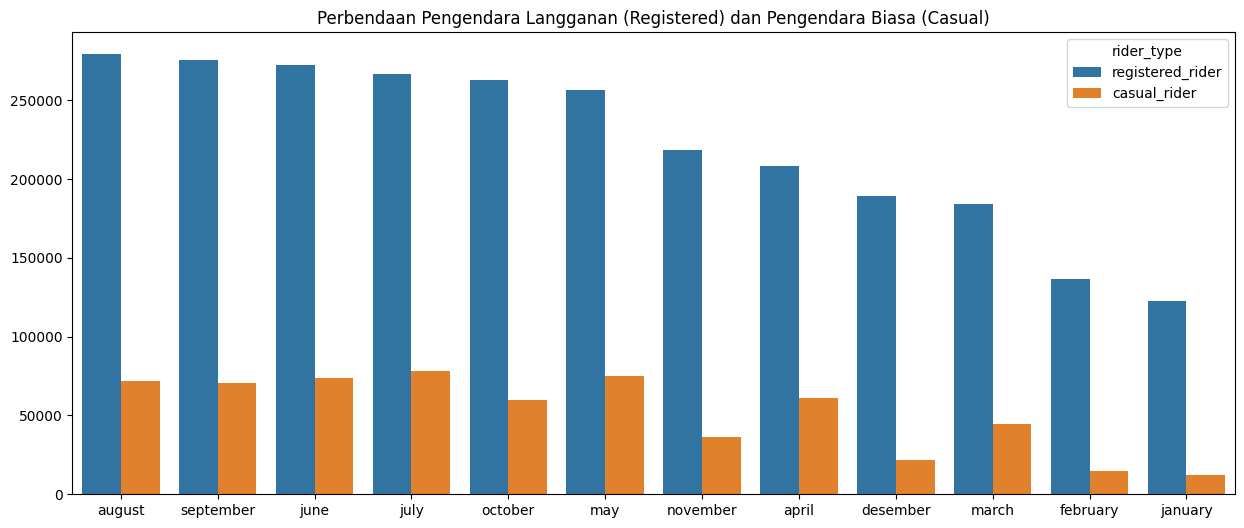

In [35]:
plt.figure(figsize=(15, 6))

sns.barplot(data=monthly_rider_type, x="month", y="total_rider", hue="rider_type")
plt.ylabel(None)
plt.xlabel(None)
plt.title("Perbendaan Pengendara Langganan (Registered) dan Pengendara Biasa (Casual)")
plt.show()

Dari diagram di atas dapat dinyatakan bahwa jumlah penyewa sepeda berdasarkan tipe pengendara langganan terdapat di bulan agustus dan diikuti bulan september. Selain itu, penyewaan sepeda pengendara biasa yang terbanyak terdapat di bulan juli.

### Pertanyaan 2: Bagaimana dampak musim (springer, summer, fall, winter) mempengaruhi total penyewaan sepeda? Musim apa yang paling banyak menyewa sepeda?

In [36]:
season_rider = day_df.groupby("season").total_rider.sum().sort_values(ascending=False).reset_index()
season_rider

,season,total_rider
0,fall,1061129
1,summer,918589
2,winter,841613
3,springer,471348


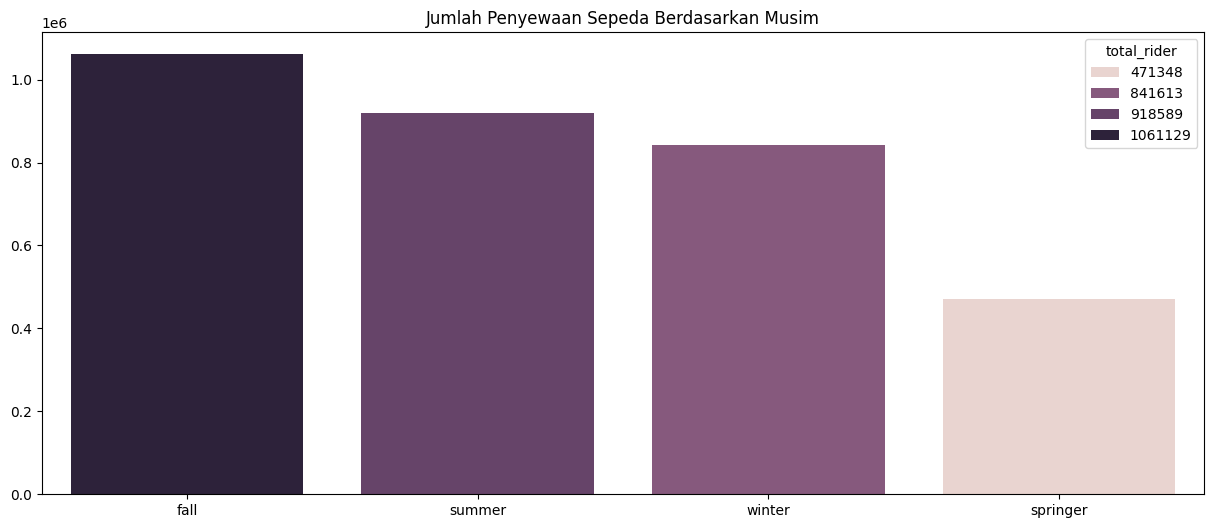

In [37]:
plt.figure(figsize=(15, 6))

sns.barplot(data=season_rider, x="season", y="total_rider", hue="total_rider")
plt.ylabel(None)
plt.xlabel(None)
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim")
plt.show()

Musim gugur (fall) dan musim panas (summer) memiliki jumlah penyewaan sepeda yang terbanyak dibanding musim lainnya.

### Pertanyaan 3: Bagaimana performa penyewaan sepeda setiap bulan?

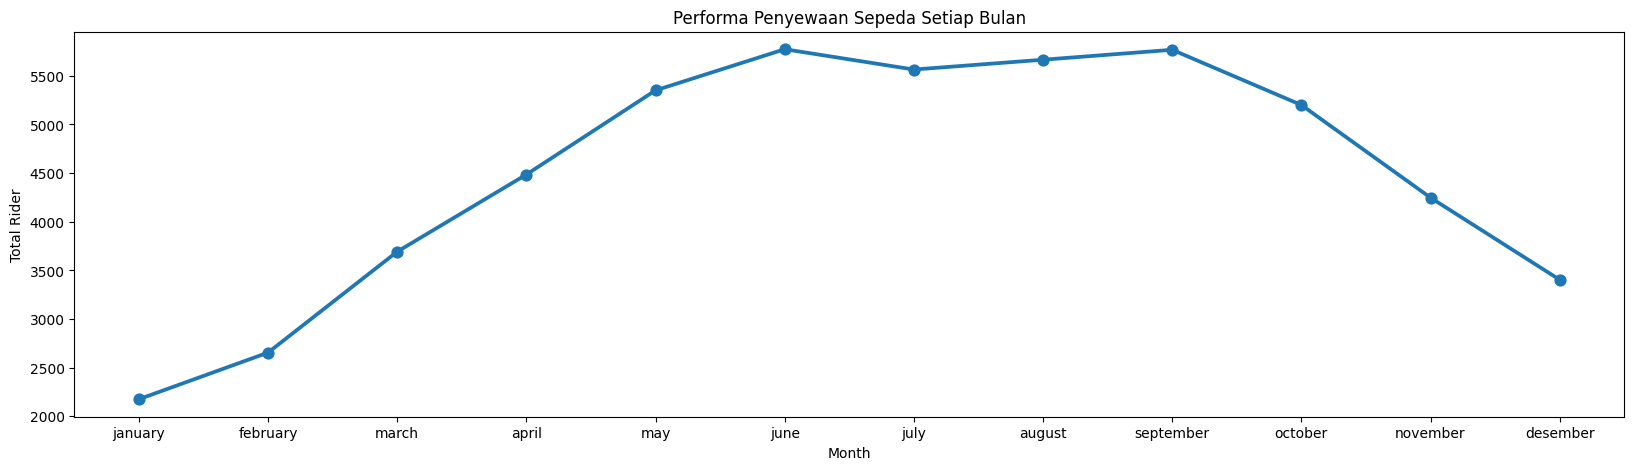

In [38]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=day_df, x="month", y="total_rider", errorbar=None, ax=ax)
ax.set(title="Performa Penyewaan Sepeda Setiap Bulan")
ax.set_ylabel("Total Rider")
ax.set_xlabel("Month")
plt.show()

Berdasarkan dari gambar di atas, puncak penyewa sepeda terbanyak berada di bulan juni dan kondisinya cenderung bertahan hingga di bulan september. 

## Conclusion

- Penyewa sepeda tipe pengendara langganan cenderung memiliki jumlah yang lebih banyak dibanding tipe pengendara biasa. Berdasarkan hasil visualisasi pada pertanyaan pertama, bulan agustus memiliki jumlah penyewa sepeda terbanyak untuk tipe pengendara langganan. Sedangkan, penyewaan sepeda tipe pengendara biasa terdapat di bulan juli.
- Ternyata penyewa sepeda terbanyak terdapat di musim gugur, lalu diikuti dengan musim panas. Hal ini dapat dilihat pada visualilasi berdasarkan pertanyaan kedua.
- Berdasarkan hasil visualisasi di atas, jumlah penyewaan tertinggi terdapat di bulan juni dan cenderung masih sama sampai bulan september. Namun, terjadi penurunan penyewaan sepeda setelah bulan september.

In [39]:
day_df.to_csv("dashboard/day_clean.csv", index=False)

In [40]:
hour_df.to_csv("dashboard/hour_clean.csv", index=False)